In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GRU, Dense

In [42]:
# Load the dataset
data = pd.read_csv("/home/belief/Desktop/MLProj1/mini-project-1/datasets/train/train_text_seq.csv")
val_data = pd.read_csv("/home/belief/Desktop/MLProj1/mini-project-1/datasets/valid/valid_text_seq.csv")

# Separate features and labels
X_train = data['input_str']
y_train = data['label']
X_test = val_data['input_str'] 
y_test = val_data['label'] 


In [43]:
# Tokenize the sequences
tokenizer = Tokenizer(char_level=True)  # Treat each character as a token
tokenizer.fit_on_texts(X_train)

# Tokenize X_train
sequences_train = tokenizer.texts_to_sequences(X_train)
X_train_padded = pad_sequences(sequences_train, maxlen=max_length, padding='post')

# Tokenize X_test
sequences_test = tokenizer.texts_to_sequences(X_test)
X_test_padded = pad_sequences(sequences_test, maxlen=max_length, padding='post')

In [44]:
# Pad sequences to have the same length
max_length = max([len(seq) for seq in sequences])
X_padded = pad_sequences(sequences, maxlen=max_length, padding='post')

In [45]:
# GRU Model
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=16, input_length=max_length))  # Reduced embedding size
model.add(GRU(16, return_sequences=False))  # Reduced GRU size
model.add(Dense(8, activation='relu'))  # Smaller dense layer
model.add(Dense(1, activation='sigmoid'))


/home/belief/Desktop/MLProj1/MLProj1env/lib/python3.12/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [46]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [47]:
# Train the model
model.fit(X_train_padded, y_train, epochs=500, batch_size=32, validation_data=(X_test_padded, y_test))

Epoch 1/500
222/222 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5195 - loss: 0.6928 - val_accuracy: 0.5051 - val_loss: 0.6948
Epoch 2/500
222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5189 - loss: 0.6908 - val_accuracy: 0.6053 - val_loss: 0.6780
Epoch 3/500
222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5707 - loss: 0.6803 - val_accuracy: 0.5890 - val_loss: 0.6597
Epoch 4/500
222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5998 - loss: 0.6619 - val_accuracy: 0.6564 - val_loss: 0.6379
Epoch 5/500
222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6214 - loss: 0.6474 - val_accuracy: 0.6544 - val_loss: 0.6319
Epoch 6/500
222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6372 - loss: 0.6430 - val_accuracy: 0.6503 - val_loss: 0.6251
Epoch 7/500
222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6375 - loss: 0.6392 - val_accuracy: 0.6605 - val_loss: 0.6260
Epoch 8/500
222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6412 - loss: 0.6343 - val_accu

In [48]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test_padded, y_test)
print(f'Test Accuracy: {test_accuracy:.4f}')


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8859 - loss: 0.5308 
Test Accuracy: 0.8671


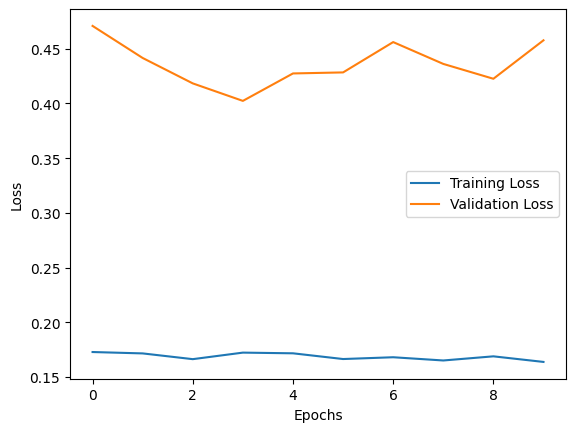

In [49]:

# Plot the loss graph
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


Text(0.5, 0, 'Epochs')

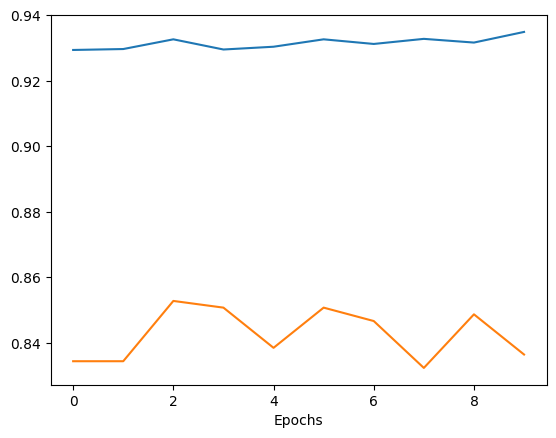

In [50]:

# Plot the accuracy graph
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')


In [51]:
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Calculate F1 score
f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1:.4f}")

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

[[217  35]
 [ 45 192]]
F1 Score: 0.8276
Accuracy: 0.8364
